In [1]:
import pandas as pd

# Paths to the CSV files
folder_path = '20M_movies/'

# Load the data
movie_df = pd.read_csv(folder_path + 'movie.csv')
genome_scores_df = pd.read_csv(folder_path + 'genome_scores.csv')
genome_tags_df = pd.read_csv(folder_path + 'genome_tags.csv')
link_df = pd.read_csv(folder_path + 'link.csv')
rating_df = pd.read_csv(folder_path + 'rating.csv')
tag_df = pd.read_csv(folder_path + 'tag.csv')

# Example Preprocessing for movie.csv
# Extract year and clean title
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df['title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

# One-hot encode genres
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split('|'))
genres_encoded = movie_df['genres'].explode().unique()
for genre in genres_encoded:
    movie_df[genre] = movie_df['genres'].apply(lambda x: 1 if genre in x else 0)
movie_df.drop('genres', axis=1, inplace=True)

# Display the processed movie data
print(movie_df.head())


/var/folders/6w/6svmby417ss2398w2w4jf4jm0000gn/T/ipykernel_98239/2288748142.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   movieId                               title  year  Adventure  Animation  \
0        1                    Toy Story (1995)  1995          1          1   
1        2                      Jumanji (1995)  1995          1          0   
2        3             Grumpier Old Men (1995)  1995          0          0   
3        4            Waiting to Exhale (1995)  1995          0          0   
4        5  Father of the Bride Part II (1995)  1995          0          0   

   Children  Comedy  Fantasy  Romance  Drama  ...  Horror  Mystery  Sci-Fi  \
0         1       1        1        0      0  ...       0        0       0   
1         1       0        1        0      0  ...       0        0       0   
2         0       1        0        1      0  ...       0        0       0   
3         0       1        0        1      1  ...       0        0       0   
4         0       1        0        0      0  ...       0        0       0   

   IMAX  Documentary  War  Musical  Western  Film-Noir  (no ge

In [3]:
# --- Continue Preprocessing ---

# Process 'genome_scores.csv' and 'genome_tags.csv'
genome_scores_df = pd.merge(genome_scores_df, genome_tags_df, on='tagId')

# Process 'rating.csv'
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])

# Process 'tag.csv'
tag_df['timestamp'] = pd.to_datetime(tag_df['timestamp'])

# --- Data Integration ---

# Merge movie details with ratings
movie_ratings_df = pd.merge(movie_df, rating_df, on='movieId')

# Merge movie details with tags (optional, based on the need)
# This step can create a very large table if each tag is treated as a separate row. 
# Consider aggregating tags at the movie level if necessary.
movie_tags_df = pd.merge(movie_df, tag_df, on='movieId')

# Merge movie details with genome scores (optional, based on the need)
movie_genome_df = pd.merge(movie_df, genome_scores_df, on='movieId')

# Display the integrated data
print(movie_ratings_df.head())
print(movie_tags_df.head())
print(movie_genome_df.head())


   movieId             title  year  Adventure  Animation  Children  Comedy  \
0        1  Toy Story (1995)  1995          1          1         1       1   
1        1  Toy Story (1995)  1995          1          1         1       1   
2        1  Toy Story (1995)  1995          1          1         1       1   
3        1  Toy Story (1995)  1995          1          1         1       1   
4        1  Toy Story (1995)  1995          1          1         1       1   

   Fantasy  Romance  Drama  ...  IMAX  Documentary  War  Musical  Western  \
0        1        0      0  ...     0            0    0        0        0   
1        1        0      0  ...     0            0    0        0        0   
2        1        0      0  ...     0            0    0        0        0   
3        1        0      0  ...     0            0    0        0        0   
4        1        0      0  ...     0            0    0        0        0   

   Film-Noir  (no genres listed)  userId  rating           timestamp

In [4]:
# Continue Preprocessing

# Process 'genome_scores.csv' and 'genome_tags.csv'
genome_scores_df = pd.merge(genome_scores_df, genome_tags_df, on='tagId')

# Process 'rating.csv'
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])

# Process 'tag.csv'
tag_df['timestamp'] = pd.to_datetime(tag_df['timestamp'])

# Data Integration

# Merge movie details with ratings
movie_ratings_df = pd.merge(movie_df, rating_df, on='movieId')

# Merge movie details with tags
# Note: This step can result in a very large table if each tag is treated as a separate row.
# Consider aggregating tags at the movie level if necessary.
movie_tags_df = pd.merge(movie_df, tag_df, on='movieId')

# Merge movie details with genome scores
# Optional: You can select relevant columns or aggregate data as needed.
movie_genome_df = pd.merge(movie_df, genome_scores_df, on='movieId')

# Display the integrated data
print("Movie Ratings Data:")
print(movie_ratings_df.head())
print("\nMovie Tags Data:")
print(movie_tags_df.head())
print("\nMovie Genome Data:")
print(movie_genome_df.head())


Movie Ratings Data:
   movieId             title  year  Adventure  Animation  Children  Comedy  \
0        1  Toy Story (1995)  1995          1          1         1       1   
1        1  Toy Story (1995)  1995          1          1         1       1   
2        1  Toy Story (1995)  1995          1          1         1       1   
3        1  Toy Story (1995)  1995          1          1         1       1   
4        1  Toy Story (1995)  1995          1          1         1       1   

   Fantasy  Romance  Drama  ...  IMAX  Documentary  War  Musical  Western  \
0        1        0      0  ...     0            0    0        0        0   
1        1        0      0  ...     0            0    0        0        0   
2        1        0      0  ...     0            0    0        0        0   
3        1        0      0  ...     0            0    0        0        0   
4        1        0      0  ...     0            0    0        0        0   

   Film-Noir  (no genres listed)  userId  rating

In [6]:
import networkx as nx

# Assuming the data has already been loaded and integrated as described earlier
# movie_ratings_df, movie_tags_df, movie_genome_df are the integrated dataframes

# Create a graph
G = nx.Graph()

# Add nodes and edges for movies and genres
for _, row in movie_df.iterrows():
    movie_id = row['movieId']
    title = row['title']
    year = row['year']
    G.add_node(movie_id, type='movie', title=title, year=year)

    for genre in genres_encoded:
        if row[genre] == 1:
            G.add_node(genre, type='genre')
            G.add_edge(movie_id, genre)

# Add nodes and edges for movies and tags
for _, row in movie_tags_df.iterrows():
    movie_id = row['movieId']
    tag = row['tag']
    G.add_node(tag, type='tag')
    G.add_edge(movie_id, tag)

# Example: Inspect the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 65923
Number of edges: 254094


/opt/homebrew/anaconda3/envs/DL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/DL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/DL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/DL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/DL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


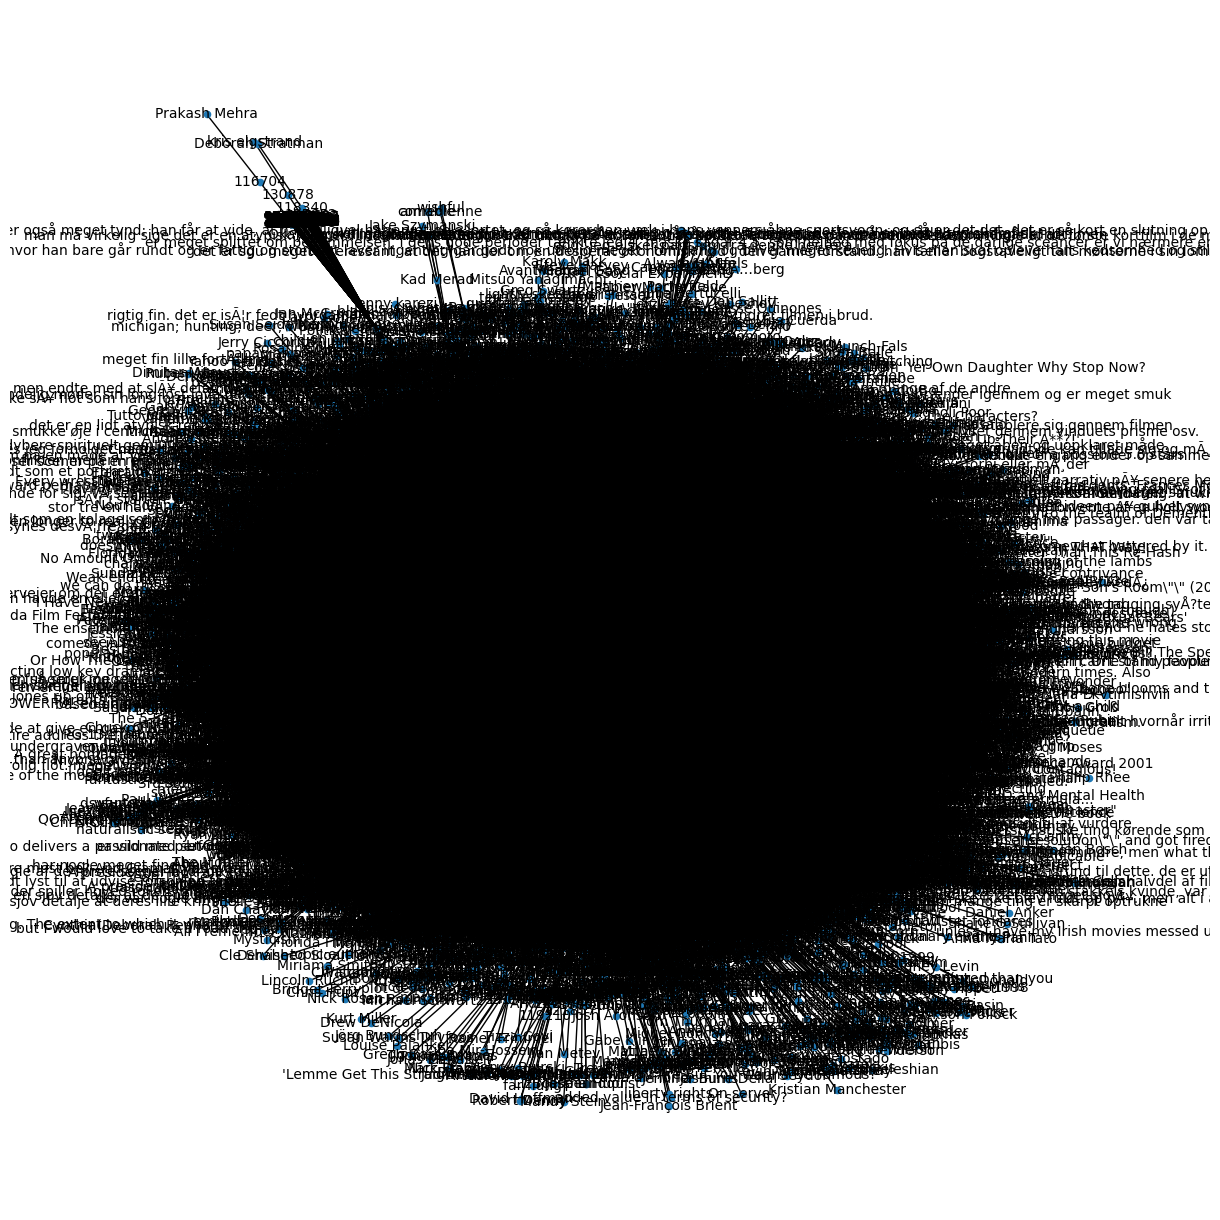

In [7]:
# You can also visualize the graph (for a small subset to keep it readable)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=20, font_size=10)
plt.show()